# Basic Image Processing in Julia

## Images.jl

-   `Images.jl`: meta-package for image processing
-   Maintained by `JuliaImages` github organization
-   Common image representation, many dedicated packages for individual
    tasks

In [1]:
import Pkg
Pkg.add("Images")
using Images

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Uni/CV/Project.toml`
  No Changes to `~/Uni/CV/Manifest.toml`
Precompiling project...
  ✓ ImageCore
  ✓ Netpbm
  ✓ ImageMorphology
  ✓ Sixel
  ✓ JpegTurbo
  ✓ ImageBase
  ✓ PNGFiles
  ✓ TiffImages
  ✓ ImageMagick
  ✓ ImageIO
  ✓ ImageDistances
  ✓ ImageShow
  ✓ ImageAxes
  ✓ ImageTransformations
  ✓ ImageMetadata
  ✓ ImageContrastAdjustment
  ✓ ImageFiltering
  ✓ ImageQualityIndexes
  ✓ ImageSegmentation
  ✓ Images
  20 dependencies successfully precompiled in 110 seconds. 207 already precompiled.


## The basics: load, show, save

-   Interaction with image files via `FileIO.jl` package
    -   `load()` function for loading images
    -   `save()` function for saving images
-   Parsing of images requires `ImageMagick.jl` to be installed

In [3]:
import Pkg
Pkg.add("FileIO")
using FileIO

   Resolving package versions...
    Updating `~/Uni/CV/Project.toml`
  [5789e2e9] + FileIO v1.16.0
  No Changes to `~/Uni/CV/Manifest.toml`


### Loading images

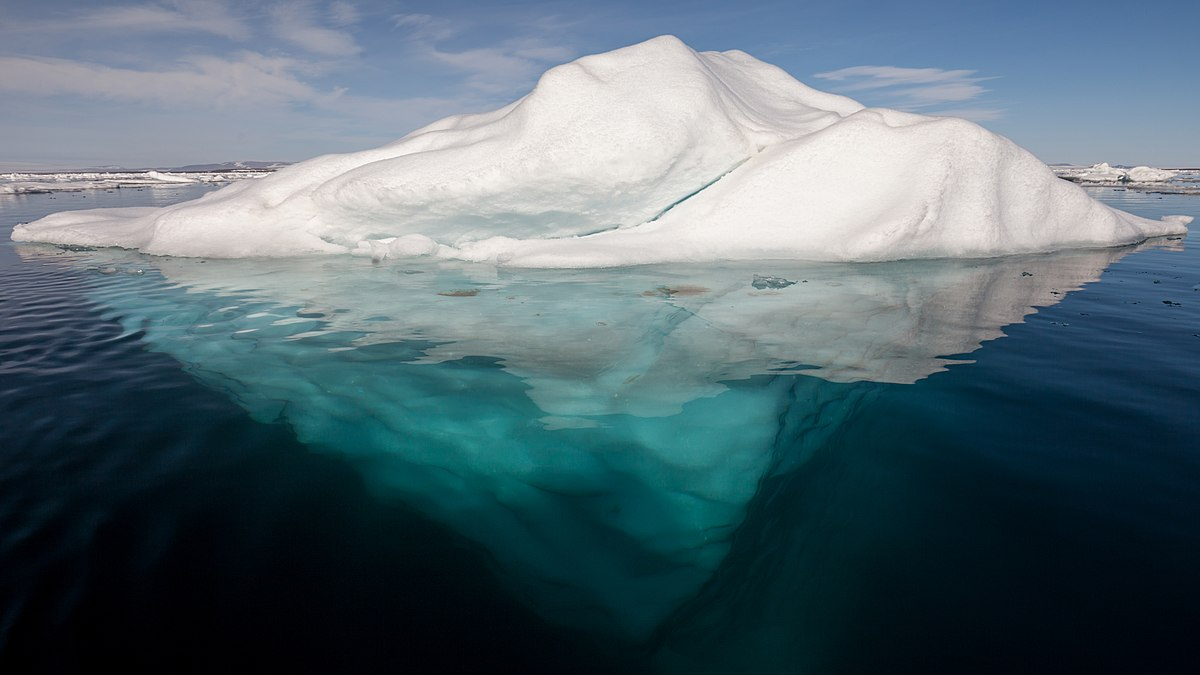

In [4]:
img1 = load("images/iceberg.jpg")
# Image source: https://commons.wikimedia.org/wiki/File:Iceberg_in_the_Arctic_with_its_underside_exposed.jpg
# AWeith via Wikimedia (CC-SA license)

-   `TestImages.jl` contains many example images commonly used in the CV
    community

In [ ]:
using TestImages
img2 = testimage("lighthouse")

### Writing images to file

In [ ]:
save("images/lighthouse.jpg", img2)

In [ ]:
load("images/lighthouse.jpg")

### Displaying images

-   Several packages support image display:
    -   `ImageShow.jl` integrates with Jupyter / Juno
    -   `ImageView.jl` comes with a display GUI
    -   `ImageInTerminal.jl` can display images in the REPL
    -   `Plots.jl` and `Makie.jl` know how to display images
-   In interactive environments, images “just work”, in scripts use
    `ImageView` (interactive) or write to file

## Image representation: arrays of pixels

-   Each image is represented as an `Array` of pixels
-   Pixels can have different types, which correspond to the
    interpretation of the image channels
    -   e.g., `RGB` has 3 values (channels), corresponding to red, green
        and blue
    -   `Gray` has a single value, the pixel intensity
    -   `HSV`, `Lab`, `XYZ`, etc.

In [5]:
typeof(img1)

Matrix{RGB{N0f8}} (alias for Array{RGB{Normed{UInt8, 8}}, 2})

In [6]:
typeof(float.(img1))

Matrix{RGB{Float32}} (alias for Array{RGB{Float32}, 2})

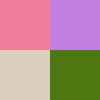

In [7]:
rand(RGB, 2, 2)

-   Use `colorview()` and `channelview()` to convert from/to raw
    `Array`s

In [8]:
typeof(channelview(float.(img1)))

Base.ReinterpretArray{Float32, 3, RGB{Float32}, Matrix{RGB{Float32}}, true}

### Changing pixel type

-   Conversions between color spaces are achieved by changing pixel type

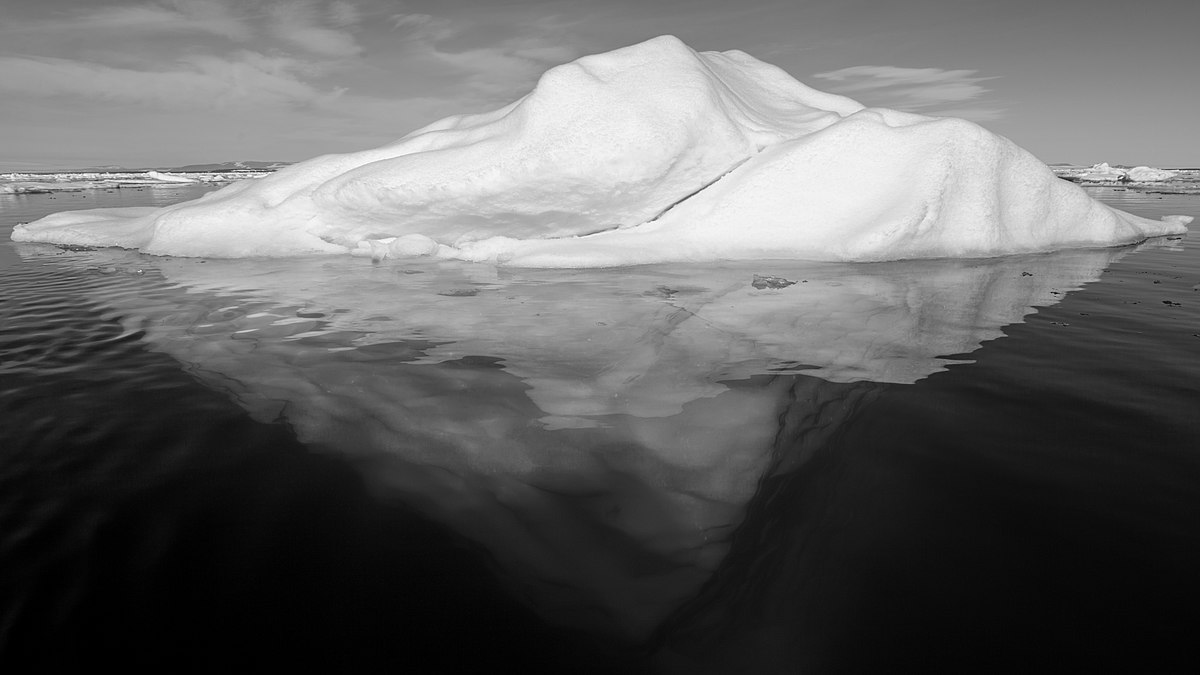

In [9]:
Gray.(img1)

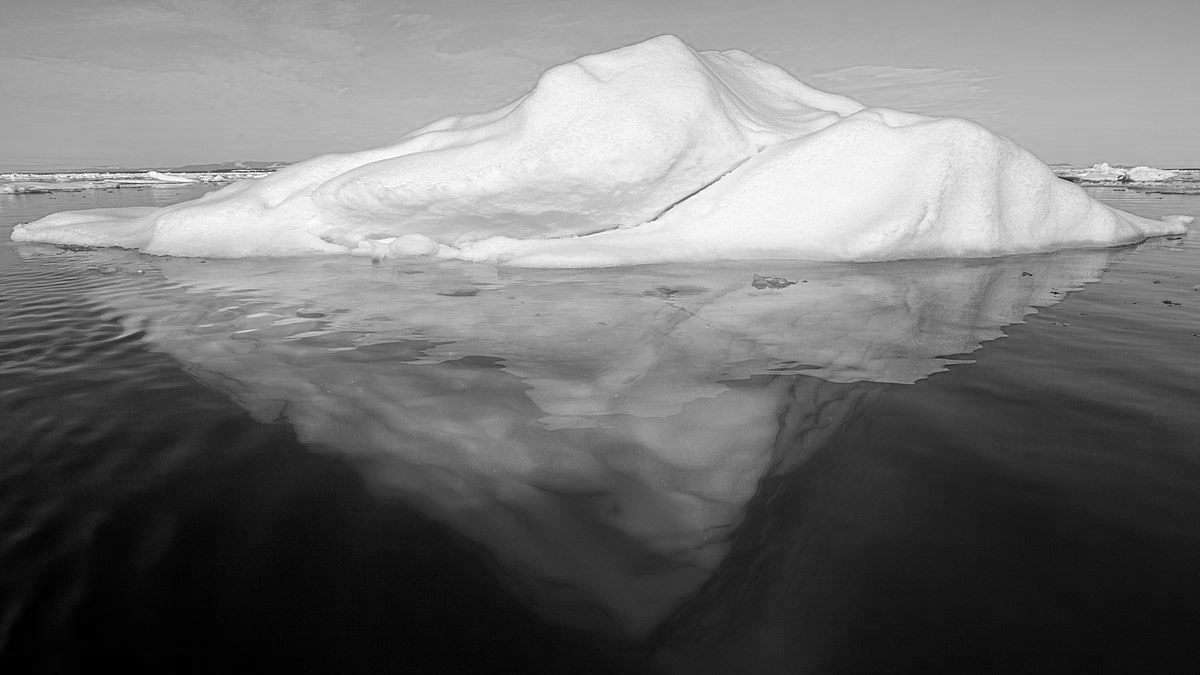

In [12]:
Gray.(channelview(HSV.(img1))[3,:,:])

## Transforming images

-   Basic image transforms are implemented in `ImageTransformations.jl`
    -   e.g., `imresize()` for changing resolution
    -   `imrotate()` for rotation
    -   `warp()` for general image warping

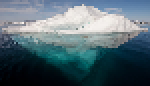

In [13]:
small = imresize(img1, ratio=1/16)

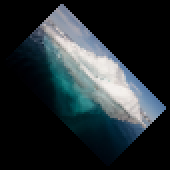

In [14]:
imrotate(small, π/4)

## Basic image processing: filters

-   Image filtering is implemented in `ImageFiltering.jl`
    -   core function: `imfilter()`
    -   arbitrary (e.g., nonlinear) operations can be implemented with
        `mapwindow`
-   Common kernels implemented in `ImageFiltering.Kernel` and
    `ImageFiltering.KernelFactors`

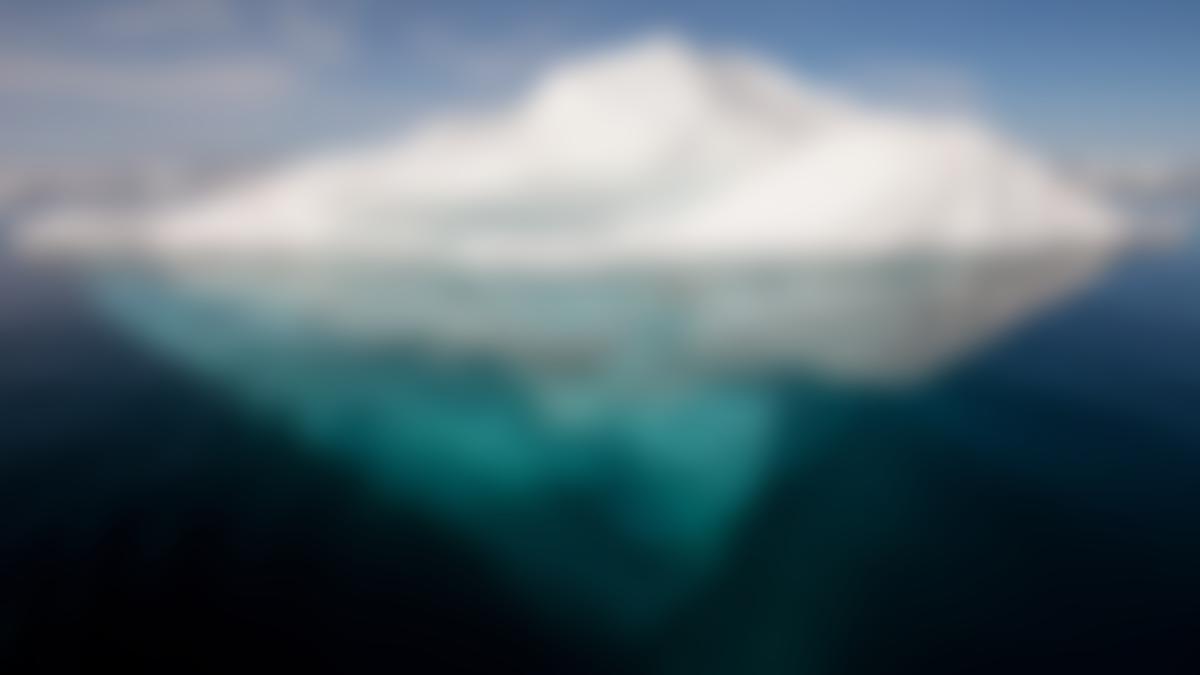

In [16]:
imfilter(img1, Kernel.gaussian(15.0))

### Filter kernels

-   To create your own filters, just use `Array`s
-   Central array element should have index `(0, 0)`
    -   use `OffsetArray`
    -   simple generation via `centered()`
-   Technically, `imfilter()` uses correlation, not convolution, so
    `reflect()` your kernel

In [17]:
filt = [1 0.5 0; 0.5 0 -0.5; 0 -0.5 -1];

In [18]:
centered(filt);

In [19]:
reflect(centered(filt));

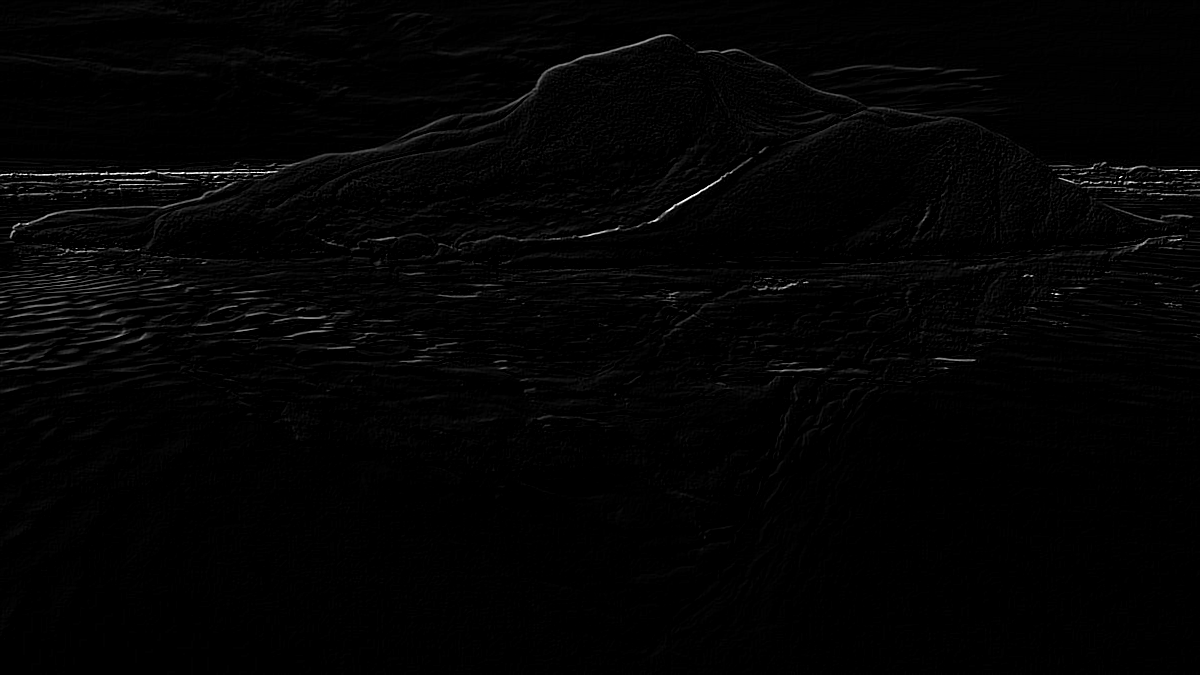

In [21]:
imfilter(Gray.(img1), reflect(centered(filt)))

## Further Reading

-   The JuliaImages documentation:
    [juliaimages.org](https://juliaimages.org/latest/)
-   JuliaImages github organization:
    [github.com/JuliaImages](https://github.com/JuliaImages)
-   Comparison to Python and Matlab:
    [juliaimages.org/latest/api\_comparison](https://juliaimages.org/latest/api_comparison/)
-   Julia frontend to OpenCV library:
    [juliaopencv.github.io/latest/](https://juliaopencv.github.io/latest/)